<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>
<center><b><h1>Meet Bagda - 102</b></center>    
<center><b><h1>22010101007</b></center>    
<center><b><h1>Lab - 4 - Polynomial Regression</b></center>    
<pre>    

# Importing the libraries

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


# Importing the libraries

# Plot the data using scatter plot

In [218]:
df = pd.read_csv('./Position_Salaries.csv')
df

# position column not needed to add for input

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<Axes: >

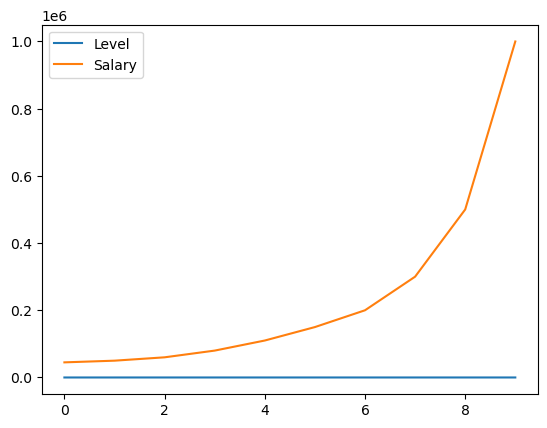

In [219]:
df.plot()

# Splitting the dataset into the Training set and Test set

In [220]:
X = df.iloc[::,1:2] # it will return dataframe instead of series
Y = df['Salary']
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [221]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=0)
X_test.sort_values(ascending=True,by='Level')

,Level
1,2
2,3
4,5
8,9
9,10


# Fitting Linear Regression to the dataset

In [222]:

model = linear_model.LinearRegression()


In [223]:
model.fit(X_train,Y_train)

LinearRegression()

# Predict the x_test using Linear Model

In [224]:
NewY = model.predict(X_test)
NewY

array([ 81071.42857143, 282694.80519481, 148279.22077922, 316298.7012987 ,
        47467.53246753])

In [225]:
Y_test

2      60000
8     500000
4     110000
9    1000000
1      50000
Name: Salary, dtype: int64

# Visualising the Linear Regression results

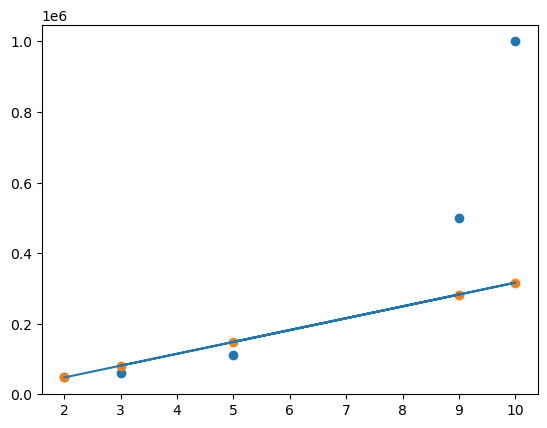

In [226]:
plt.scatter(X_test['Level'],Y_test)
plt.scatter(X_test['Level'],NewY)
plt.plot(X_test['Level'],NewY)



# Find mean-square-error

In [227]:
mean_squared_error(Y_test,NewY)

103316946154.49487

# Fitting Polynomial Regression to the dataset

## import  PolynomialFeatures 
### imp for exam

In [228]:
from sklearn.preprocessing import PolynomialFeatures

## create PolynomialFeatures of degree 4

In [229]:
poly = PolynomialFeatures(degree=4)

## Apply fit_transform to features

In [230]:
X_poly = poly.fit_transform(X_train)

## View new  Features

In [231]:
X_poly

array([[1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03]])

## Fitting Polynomial Regression to the dataset

In [232]:
model_poly = linear_model.LinearRegression()

In [233]:
model_poly.fit(X_poly,Y_train)

LinearRegression()

# Create Grid for higher resolution and smoother curve

In [234]:
x2 = np.arange(1,11,0.1).reshape(-1,1)
x2

array([[ 1. ],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       [ 2.3],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.7],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3.1],
       [ 3.2],
       [ 3.3],
       [ 3.4],
       [ 3.5],
       [ 3.6],
       [ 3.7],
       [ 3.8],
       [ 3.9],
       [ 4. ],
       [ 4.1],
       [ 4.2],
       [ 4.3],
       [ 4.4],
       [ 4.5],
       [ 4.6],
       [ 4.7],
       [ 4.8],
       [ 4.9],
       [ 5. ],
       [ 5.1],
       [ 5.2],
       [ 5.3],
       [ 5.4],
       [ 5.5],
       [ 5.6],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.3],
       [ 6.4],
       [ 6.5],
       [ 6.6],
       [ 6.7],
       [ 6.8],
       [ 6.9],
       [ 7. ],
       [ 7.1],
       [ 7.2],
       [ 7.3],
       [ 7.4],
       [ 7.5],
       [ 7

In [235]:
smoothY = model_poly.predict(poly.fit_transform(x2))
smoothY

array([  44999.99999999,   38970.31666664,   33857.06666662,
         29603.79285708,   26155.73333326,   23459.82142848,
         21464.68571419,   20120.6499999 ,   19379.73333323,
         19195.64999989,   19523.8095237 ,   20321.31666656,
         21546.97142846,   23161.26904751,   25126.3999999 ,
         27406.2499999 ,   29966.39999991,   32774.12619039,
         35798.39999992,   39009.88809517,   42380.95238089,
         45885.64999994,   49499.73333328,   53200.64999996,
         56967.54285711,   60781.24999997,   64624.30476188,
         68480.93571427,   72337.06666666,   76180.31666666,
         80000.        ,   83787.12619048,   87534.40000001,
         91236.22142859,   94888.6857143 ,   98489.58333335,
        102038.40000002,  105536.31666669,  108986.20952384,
        112392.65000003,  115761.90476193,  119101.93571431,
        122422.40000002,  125734.65000002,  129051.73333335,
        132388.39285716,  135761.06666668,  139187.88809525,
        142688.68571429,

# Predict the x_test using Polynomial Regression

In [236]:
y_poly_predict=model_poly.predict(poly.fit_transform(X_test))
y_poly_predict

array([ 42380.95238089, 501190.47619085, 115761.90476193, 871714.28571546,
        19523.8095237 ])

# Visualising the Linear Regression results

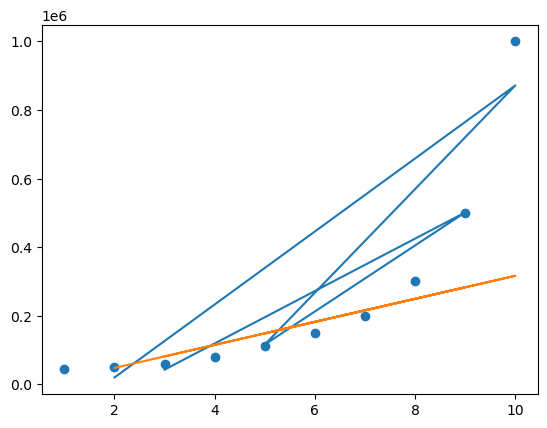

In [237]:
plt.scatter(X,Y)
plt.plot(X_test,y_poly_predict)
plt.plot(X_test,NewY)


In [238]:
y_all = model_poly.predict(poly.fit_transform(X))

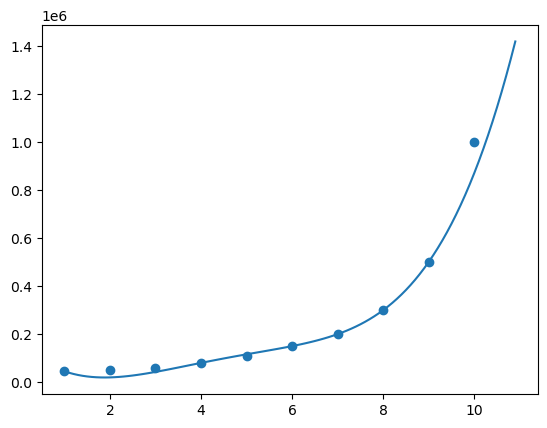

In [239]:
plt.scatter(X,Y)
plt.plot(x2,smoothY)

In [242]:
from sklearn.metrics import r2_score

In [244]:
r2_score(Y_test,y_poly_predict)

0.9737907670216805